
Training and evaluating SVM Pipeline...
Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'pca__n_components': 15}
Accuracy: 0.9825
F1 Score: 0.9862
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Training and evaluating KNN Pipeline...
Best parameters: {'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Accuracy: 0.9708
F1 Score: 0.9770
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97  

C:\Users\Asus\AppData\Local\Temp\ipykernel_44876\636430593.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Pipeline', data=metrics_df, palette='viridis')


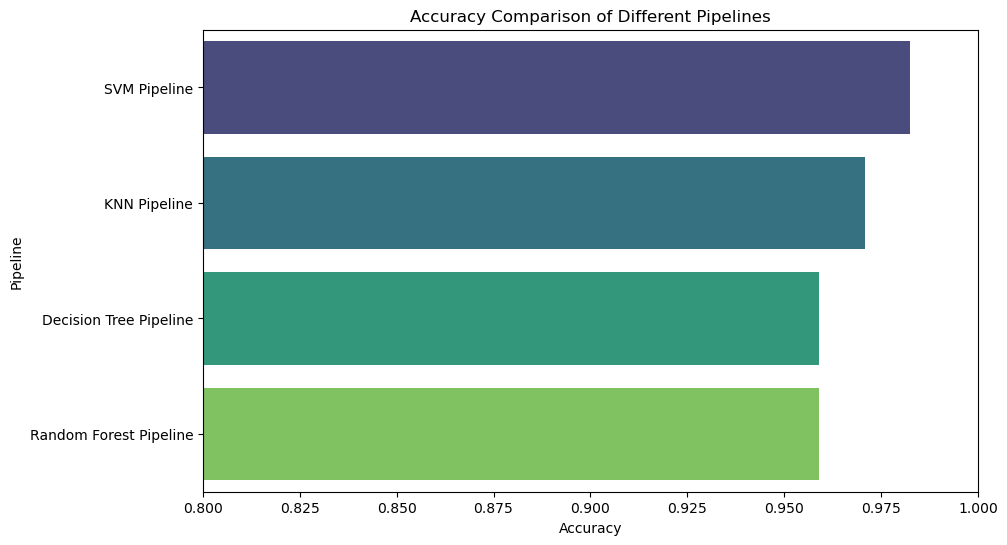

C:\Users\Asus\AppData\Local\Temp\ipykernel_44876\636430593.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Pipeline', data=metrics_df, palette='viridis')


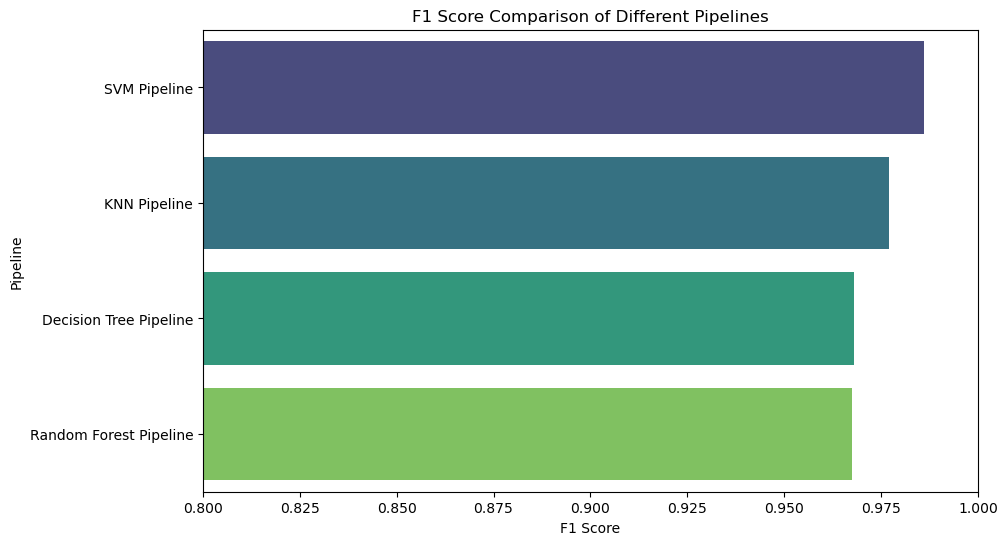

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Визначення конвейєрів

## Конвейєр 1: StandardScaler -> PCA -> SVM
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

params1 = {
    'pca__n_components': [2, 5, 10, 15, 20],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf']
}

## Конвейєр 2: StandardScaler -> KNN
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

params2 = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}

## Конвейєр 3: MinMaxScaler -> StandardScaler -> Decision Tree
pipeline3 = Pipeline([
    ('minmax', MinMaxScaler()),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

params3 = {
    'classifier__max_depth': [None, 3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

## Конвейєр 4: StandardScaler -> PCA -> Random Forest
pipeline4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

params4 = {
    'pca__n_components': [2, 5, 10, 15, 20],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

# Створення списку конвейєрів та їх параметрів
pipelines = [pipeline1, pipeline2, pipeline3, pipeline4]
params_list = [params1, params2, params3, params4]
pipeline_names = ['SVM Pipeline', 'KNN Pipeline', 'Decision Tree Pipeline', 'Random Forest Pipeline']

# Навчання та оцінка моделей
results = []
best_models = []

for i, (pipeline, params) in enumerate(zip(pipelines, params_list)):
    print(f"\nTraining and evaluating {pipeline_names[i]}...")
    
    # Пошук оптимальних параметрів
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Найкраща модель
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    
    # Прогнозування на тестових даних
    y_pred = best_model.predict(X_test)
    
    # Оцінка результатів
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results.append({
        'Pipeline': pipeline_names[i],
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Classification Report': report
    })
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Вибір найкращого конвейєра
best_idx = np.argmax([result['Accuracy'] for result in results])
best_pipeline = pipeline_names[best_idx]
best_result = results[best_idx]

print("\n=== Best Pipeline ===")
print(f"Name: {best_pipeline}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"F1 Score: {best_result['F1 Score']:.4f}")
print("Best Parameters:")
print(best_result['Best Parameters'])
print("Classification Report:")
print(best_result['Classification Report'])

# Візуалізація результатів
metrics_df = pd.DataFrame({
    'Pipeline': [res['Pipeline'] for res in results],
    'Accuracy': [res['Accuracy'] for res in results],
    'F1 Score': [res['F1 Score'] for res in results]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Pipeline', data=metrics_df, palette='viridis')
plt.title('Accuracy Comparison of Different Pipelines')
plt.xlim(0.8, 1.0)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Pipeline', data=metrics_df, palette='viridis')
plt.title('F1 Score Comparison of Different Pipelines')
plt.xlim(0.8, 1.0)
plt.show()